## Business Understanding

Machine learning has found application in various sectors of human endeavors of which marketing is not an exemption. Marketing is a key part of any business. It requires strategic steps in order to maximize its impact in today’s dynamic world using every available medium. In this work, we applied Logistic regression, Decision Tree, Support Vector Machine and Randon Forest algorithms in machine learning to achieve this goal on a made-up mall customer data from kaggle.com. Our goal is to achieve high true positive (TP) and reduce false negative or type 2 error after obtaining high accuracy score. In other words, we want to have high tolerance on false positive or type 1 error.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")
sns.set(style = "white")

## Data Understanding and Preparation

In [2]:
# import data
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# reset index
data.set_index('CustomerID', inplace = True)
data.head()

,Gender,Age,Annual_Income,Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
# shape of data
data.shape

(200, 4)

In [5]:
data.tail()

,Gender,Age,Annual_Income,Spending_Score
CustomerID,,,,
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74
199,Male,32,137,18
200,Male,30,137,83


In [6]:
# columns in dataset
data.columns

Index(['Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [7]:
# check for null values
data.isnull().sum()

Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

In [8]:
# check for duplicates
data.duplicated().any()

False

In [9]:
# statistics description of data
data.describe()

,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
# statistics of categorical column
# function
def describe_cat_column(column_name):
    return data[column_name].describe()

In [11]:
# call function
describe_cat_column('Gender')

count        200
unique         2
top       Female
freq         112
Name: Gender, dtype: object

In [12]:
# Encode categorical features
encoder = LabelEncoder()
data['Gender_cat'] = encoder.fit_transform(data.Gender)
data.head()

,Gender,Age,Annual_Income,Spending_Score,Gender_cat
CustomerID,,,,,
1,Male,19,15,39,1
2,Male,21,15,81,1
3,Female,20,16,6,0
4,Female,23,16,77,0
5,Female,31,17,40,0


In [13]:
# Encode Target column
data['Target'] = pd.cut(data.Spending_Score, bins = [0, 50, 100], labels = [0, 1])
data.head()

,Gender,Age,Annual_Income,Spending_Score,Gender_cat,Target
CustomerID,,,,,,
1,Male,19,15,39,1,0
2,Male,21,15,81,1,1
3,Female,20,16,6,0,0
4,Female,23,16,77,0,1
5,Female,31,17,40,0,0


In [14]:
data['Target'].describe()

count     200
unique      2
top         0
freq      103
Name: Target, dtype: int64

In [15]:
data.drop(columns = ['Gender', 'Spending_Score'], inplace = True)
data.head()

,Age,Annual_Income,Gender_cat,Target
CustomerID,,,,
1,19,15,1,0
2,21,15,1,1
3,20,16,0,0
4,23,16,0,1
5,31,17,0,0


In [16]:
# Split data into training and testing
X = data[['Age', 'Annual_Income', 'Gender_cat']]
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

In [17]:
# Shape of train and test splits
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [18]:
# Statistics of train data
y_train.describe()

count     160
unique      2
top         0
freq       83
Name: Target, dtype: int64

In [19]:
# Statistics of test data
y_test.describe()

count     40
unique     2
top        1
freq      20
Name: Target, dtype: int64

## Modeling and Evaluation

In [20]:
# This method produces a colored heatmap that displays the relationship
# between predicted and actual types from a machine learning method.

def confusion_matrix(test, predict, labels, title = 'Confusion Matrix'):

    bins = len(labels)
    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int), index=labels, columns=labels )
    
    # Display heatmap and add decorations
    hm = sns.heatmap(pd_pts, annot = True, fmt = "d")    
    hm.axes.set_title(title, fontsize = 20)
    hm.axes.set_xlabel('Predicted', fontsize = 18)
    hm.axes.set_ylabel('Actual', fontsize = 18)

    return None

### Metrics Calculation

#### Accuracy Score

$$
Accuracy Score = \frac{Correct Predictions}{All Predictions} = \frac{TP + TN}{TP + TN + FP + FN}
$$

#### Precision
$$
Positive Precision = \frac{True Positive}{Predicted Positive} = \frac{TP}{TP + FP}
$$

$$
Negative Precision = \frac{True Negative}{Predicted Negative} = \frac{TN}{TN + FN}
$$

#### Recall

$$
Positive Recall = \frac{True Positive}{Actual Positive} = \frac{TP}{TP + FN}
$$

$$
Negative Recall = \frac{True Negative}{Actual Negative} = \frac{TN}{TN + FP}
$$


### Logistic Regression model

In [21]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train, y_train)

In [22]:
# Model and score and report
lr_predicted = lr_model.predict(X_test)

score = 100.0 * metrics.accuracy_score(y_test, lr_predicted)
print(f'Logistic Regression [Customer Data] Score = {score:4.1f}%\n')

print('Classification Report:')
print(metrics.classification_report(y_test, lr_predicted))

Logistic Regression [Customer Data] Score = 67.5%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.70      0.68        20
           1       0.68      0.65      0.67        20

    accuracy                           0.68        40
   macro avg       0.68      0.68      0.67        40
weighted avg       0.68      0.68      0.67        40



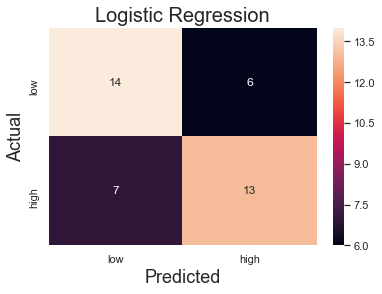

In [23]:
# Call confusion matrix function
confusion_matrix(y_test, lr_predicted, ['low', 'high'], title = 'Logistic Regression')

### Decision Tree classifier.

In [24]:
dt_model = DecisionTreeClassifier(random_state = 23)
dt_model = dt_model.fit(X_train, y_train)

In [25]:
# Model and score and report
dt_predicted = dt_model.predict(X_test)

score = 100.0 * dt_model.score(X_test, y_test)
print(f'Decision Tree [Customer Data] Score = {score:4.1f}%\n')

print('Classification Report:')
print(metrics.classification_report(y_test, dt_predicted))

Decision Tree [Customer Data] Score = 60.0%

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.70      0.64        20
           1       0.62      0.50      0.56        20

    accuracy                           0.60        40
   macro avg       0.60      0.60      0.60        40
weighted avg       0.60      0.60      0.60        40



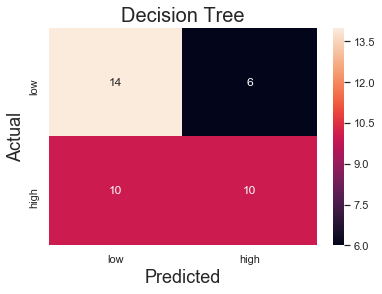

In [26]:
# call confusion matrix function
confusion_matrix(y_test, dt_predicted, ['low', 'high'], title = 'Decision Tree')

### Support Vector Classifier

In [27]:
svm_model = SVC(kernel='linear')
svm_model = svm_model.fit(X_train, y_train)

In [28]:
svm_predicted = svm_model.predict(X_test)

score = 100.0 * svm_model.score(X_test, y_test)
print(f'Support Vector Classifier [Customer Data] Score = {score:4.1f}%\n')

print('Classification Report:')
print(metrics.classification_report(y_test, svm_predicted))

Support Vector Classifier [Customer Data] Score = 72.5%

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        20
           1       0.71      0.75      0.73        20

    accuracy                           0.73        40
   macro avg       0.73      0.72      0.72        40
weighted avg       0.73      0.72      0.72        40



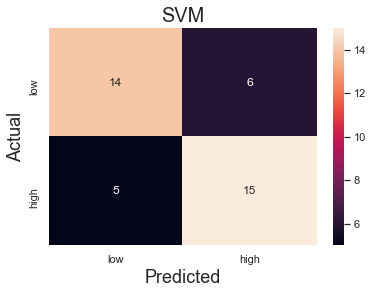

In [29]:
# call confusion matrix function
confusion_matrix(y_test, svm_predicted, ['low', 'high'], title = 'SVM')

### Random Forest Classifier

In [30]:
rf_model = RandomForestClassifier(random_state=23)
rf_model = rf_model.fit(X_train, y_train)

In [31]:
rf_predicted = rf_model.predict(X_test)

score = 100.0 * rf_model.score(X_test, y_test)
print(f'Random Forest Classifier [Customer Data] Score = {score:4.1f}%\n')

print('Classification Report:')
print(metrics.classification_report(y_test, rf_predicted))

Random Forest Classifier [Customer Data] Score = 65.0%

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65        20
           1       0.65      0.65      0.65        20

    accuracy                           0.65        40
   macro avg       0.65      0.65      0.65        40
weighted avg       0.65      0.65      0.65        40



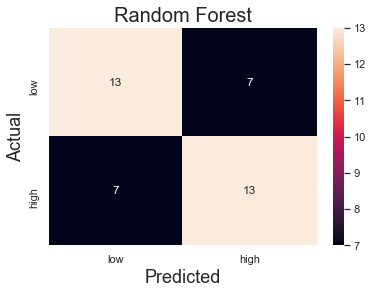

In [32]:
# call confusion matrix function
confusion_matrix(y_test, rf_predicted, ['low', 'high'], title = 'Random Forest')

We conclude with SVM as the best of the four models with an accuracy score of 72.5 % and positive recall of 75 %. Adjusting some hyper-parameters may improve our model. Also, having more data samples and probably more predictor variables can generally improve our model.